# Given features we now want to predict using an SVM

In [19]:
# Imports
import numpy as np 
import sklearn
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import xml.etree.ElementTree as ET 

from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [3]:
# Load dataa
dataset_dir = { 'image_path' : "./dataset/T1-train/img/",
    'xml_path' : "./dataset/T1-train/GT/T1-GT.xml",
    'txt_path' : "./dataset/T1-train/txt/",
    't2_image_path' : "./dataset/T1-train/img/",
    'npy_file': './dataset/old_data.npy'}

data = np.load(dataset_dir['npy_file'])
image_dict = data.item().get('image_dict')

y_dict = {}
tree = ET.parse(dataset_dir['xml_path'])
root = tree.getroot()
tampered_region = []
for elem in root:
    d = elem.attrib
    y_dict[d['id']] = int(d['modified'])
    

In [9]:
# Convert dict to numpy array
image_list = []
y_list = []
for key in image_dict:
    image_list.append(image_dict[key])
    y_list.append(y_dict[key])
image_list = np.array(image_list)
y_list = np.array(y_list)

In [21]:
image_list.shape, y_list.shape

((500, 77, 5, 5, 4, 4), (500,))

(500, 30800)


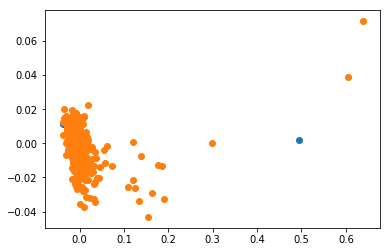

In [20]:
def do_PCA(image_list,y_list):
    pca = PCA(n_components=2)
    image_list = image_list.reshape(image_list.shape[0],-1)
    print(image_list.shape)
    pca.fit(image_list)
    image_2d = pca.fit_transform(image_list)

    gr = []
    fr = []
    for i, y in enumerate(y_dict):
        y = y_dict[y]
        if y==1:
            gr.append(image_2d[i])
        else:
            fr.append(image_2d[i])
    gr = np.array(gr)        
    fr = np.array(fr)        
    plt.scatter(gr[:,0],gr[:,1],label='tampered')
    plt.scatter(fr[:,0],fr[:,1],label='real')
    plt.show()
    
do_PCA(image_list,y_list)

In [35]:

def fit_multiple_estimators(num_classfiers, X, y):
    
    classifiers = []
    for i in range(num_classfiers):
        clf = SVC()
        classifiers.append(clf)
    # Fit all estimators with their respective feature arrays
    estimators = [clf.fit(X[:,i,:,:,:,:].reshape(image_list.shape[0],-1), y)  for i,clf in enumerate(classifiers) ]
    return estimators


def predict_from_multiple_estimator(estimators,  X):

    pred1 = np.asarray([clf.predict(X[:,i,:,:,:,:].reshape(image_list.shape[0],-1)) for i,clf in enumerate(estimators) ])
    pred2 = np.average(pred1, axis=0)
    pred = pred2 > 0.5

    # Convert integer predictions to original labels:
    return pred,pred1


In [37]:
num_classfiers = image_list.shape[1]
fit_clf_list = fit_multiple_estimators(num_classfiers,image_list,y_list)

pred, pred1 = predict_from_multiple_estimator(fit_clf_list,image_list)
print(pred)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

0